In [1]:
from KGS import *
mpl.rcParams['font.size']        = 12 # standard er 45

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


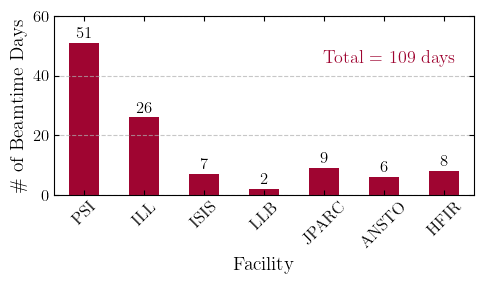

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your Excel loading logic)
data = {
    "Hvor": [
        "PSI", "PSI", "PSI", "ILL", "PSI", "MAX IV", "JPARC", "PSI", "PSI", "EPFL", "PSI", "ANSTO", "LLB", "Århus uni",
        "JPARC", "PSI", "ILL", "ISIS", "HFIR", "Utrecht", "ILL", "ILL", "PSI", "PSI", "PSI", "PSI", "ISIS", "ILL", "PSI"
    ],
    "Antal dage": [
        3, 4, 0, 6, 3, 1, 4, 7, 2, 5, 4, 6, 2, 3, 5, 7, 6, 2, 8, 2, 7, 3, 3, 3, 4, 6, 5, 4, 5
    ]
}

df = pd.DataFrame(data)

# Only include relevant facilities
valid_facilities = ['PSI', 'ILL', 'ISIS', 'LLB', 'JPARC', 'ANSTO', 'HFIR']
df = df[df['Hvor'].isin(valid_facilities)]

# Group and sum
facility_days = df.groupby('Hvor')['Antal dage'].sum().reindex(valid_facilities)
total_days = facility_days.sum()

# Plot
plt.figure(figsize=(5, 3))
ax = facility_days.plot(kind='bar', color='#9f0531')
plt.ylabel(f'\# of Beamtime Days', fontsize=14)
plt.xlabel('Facility', fontsize=14)
plt.ylim(0, 60)
#plt.title('Total Days per Facility')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels above bars
for i, (facility, value) in enumerate(facility_days.items()):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Add total days text somewhere clean (e.g. top-right)
plt.text(
    x=len(facility_days) - 0.8,
    y=max(facility_days) - 8,
    s=f'Total = {total_days} days',
    ha='right', va='bottom', fontsize=13, fontweight='bold', color='#9f0531'
)

plt.savefig('Beatime_stat.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('Beatime_stat.eps', format='eps', bbox_inches='tight')
plt.tight_layout()
plt.show()
